# Pong
Pong is played much like tennis. Using a Controller, each player rallys the ball by moving the paddles on the playfield.

Paddles move only vertically on the playfield.

A player scores one point when the opponent hits the ball out of bounds or misses a hit. The first player to score 21 points
wins the game.

The last player to score always serves the ball. 

In [1]:
import gym

from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

## Description
You control the right paddle, you compete against the left paddle controlled by the computer. You each try to keep deflecting the ball away from your goal and into your opponent’s goal.
## Actions
- 0 NOOP
- 1 FIRE
- 2 RIGHT
- 3 LEFT
- 4 RIGHTFIRE
- 5 LEFTFIRE

Three of the six are redundant: FIRE is equal to NOOP, LEFT is equal to LEFTFIRE and RIGHT is equal to RIGHTFIRE.
## Observations
The environment returns the RGB image that is displayed to human players as an observation.
## Rewards
You get score points for getting the ball to pass the opponent’s paddle. You lose points if the ball passes your paddle.

A.L.E: Arcade Learning Environment (version 0.7.4+069f8bd)
[Powered by Stella]


Observation space: Box([[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]], [[[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 ...

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]], (84, 84, 1), uint8)
Action space: Discrete(6)


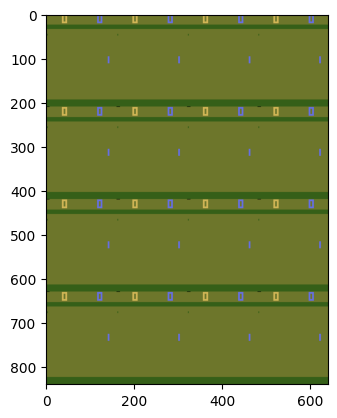

In [2]:
env = make_atari_env("PongNoFrameskip-v4", n_envs=16)
plt.imshow(env.render('rgb_array'))
plt.grid(False)
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
env = VecFrameStack(env, n_stack=4)

## Model definition
Proximal Policy Optimization (PPO) is used in this example. The network architecure is a Convolutional Neural Network (CNN) which processes the RGB image of the game.

In [11]:
model = PPO('CnnPolicy', env, verbose=0, tensorboard_log='./tb_logging')

In [4]:
# Random Agent, before training
mean_reward, std_reward = evaluate_policy(model, env, render=True, n_eval_episodes=5)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:-21.00 +/- 0.00


## Training
We train the agent for 1M steps, we can check results using the Tensorboard plugin.

The model is then saved to be exploited later.

In [6]:
# Train the agent for 10000 steps
model.learn(total_timesteps=int(1e6))
model.save('./pong')

In [13]:
# Trained Agent, after training
mean_reward, std_reward = evaluate_policy(model, env, render=True, n_eval_episodes=5, deterministic=True)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:18.80 +/- 0.98


## Model loading
A previously saved model can be loaded using the `load()` function so to continue its training or perform inference.

In [12]:
model = model.load('./pong.zip');